# Source of data sets

#### https://www.abs.gov.au/statistics/industry/retail-and-wholesale-trade/retail-trade-australia/latest-release#total-retail-turnover

# Guide Packages

In [1]:
!pip install numpy pandas matplotlib seaborn --quiet

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
from sklearn import metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from datetime import datetime
import math
import plotly.express as px
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

!pip install pingouin
import pingouin as pg

#Models
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_curve, confusion_matrix, roc_auc_score, precision_recall_curve
from sklearn.metrics import accuracy_score, f1_score,precision_score, recall_score

# input dataset


In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/MyDrive/task-in/Task5/Australia")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
Data = pd.read_csv('/content/drive/MyDrive/task-in/Task5/Australia/850103 (3).xls - Data1.csv')

In [4]:
#https://blog.csdn.net/youif/article/details/104808083?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522163608690916780269824456%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=163608690916780269824456&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduend~default-1-104808083.pc_search_es_clickV2&utm_term=pandas%E7%BB%99%E5%88%97%E5%91%BD%E5%90%8D&spm=1018.2226.3001.4187
Data.rename(columns={'Unnamed: 0':'Month'},inplace = True)

In [5]:
print(Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 28 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   Month                                                             483 non-null    object
 1   Turnover ;  New South Wales ;  Total (Industry) ;                 483 non-null    object
 2   Turnover ;  Victoria ;  Total (Industry) ;                        483 non-null    object
 3   Turnover ;  Queensland ;  Total (Industry) ;                      483 non-null    object
 4   Turnover ;  South Australia ;  Total (Industry) ;                 483 non-null    object
 5   Turnover ;  Western Australia ;  Total (Industry) ;               483 non-null    object
 6   Turnover ;  Tasmania ;  Total (Industry) ;                        483 non-null    object
 7   Turnover ;  Northern Territory ;  Total (Ind

In [6]:
Data.head(15)

,Month,Turnover ; New South Wales ; Total (Industry) ;,Turnover ; Victoria ; Total (Industry) ;,Turnover ; Queensland ; Total (Industry) ;,Turnover ; South Australia ; Total (Industry) ;,Turnover ; Western Australia ; Total (Industry) ;,Turnover ; Tasmania ; Total (Industry) ;,Turnover ; Northern Territory ; Total (Industry) ;,Turnover ; Australian Capital Territory ; Total (Industry) ;,Turnover ; Total (State) ; Total (Industry) ;,Turnover ; New South Wales ; Total (Industry) ;.1,Turnover ; Victoria ; Total (Industry) ;.1,Turnover ; Queensland ; Total (Industry) ;.1,Turnover ; South Australia ; Total (Industry) ;.1,Turnover ; Western Australia ; Total (Industry) ;.1,Turnover ; Tasmania ; Total (Industry) ;.1,Turnover ; Northern Territory ; Total (Industry) ;.1,Turnover ; Australian Capital Territory ; Total (Industry) ;.1,Turnover ; Total (State) ; Total (Industry) ;.1,Turnover ; New South Wales ; Total (Industry) ;.2,Turnover ; Victoria ; Total (Industry) ;.2,Turnover ; Queensland ; Total (Industry) ;.2,Turnover ; South Australia ; Total (Industry) ;.2,Turnover ; Western Australia ; Total (Industry) ;.2,Turnover ; Tasmania ; Total (Industry) ;.2,Turnover ; Northern Territory ; Total (Industry) ;.2,Turnover ; Australian Capital Territory ; Total (Industry) ;.2,Turnover ; Total (State) ; Total (Industry) ;.2
0,Unit,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions
1,Series Type,Original,Original,Original,Original,Original,Original,Original,Original,Original,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Trend,Trend,Trend,Trend,Trend,Trend,Trend,Trend,Trend
2,Data Type,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW
3,Frequency,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month
4,Collection Month,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,Series Start,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982
6,Series End,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021
7,No. Obs,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474
8,Series ID,A3348645F,A3348708C,A3348771V,A3348834T,A3348897A,A3348960F,A3349023F,A3349086R,A3348582J,A3348648L,A3348711T,A3348774A,A3348837X,A3348900C,A3348963L,A3349026L,A3349089W,A3348585R,A3348651A,A3348714X,A3348777J,A3348840L,A3348903K,A3348966V,A3349029V,A3349092K,A3348588W
9,4月-1982,1250.2,916.2,486.3,279.4,298.3,79.9,NaN,57.1,3396.4,1310.8,932.0,508.6,284.3,313.0,81.6,NaN,57.8,3518.7,1310.2,933.2,511.7,284.0,315.3,81.3,NaN,57.2,3523.4


In [7]:
print(Data.isnull().sum())

Month                                                                0
Turnover ;  New South Wales ;  Total (Industry) ;                    0
Turnover ;  Victoria ;  Total (Industry) ;                           0
Turnover ;  Queensland ;  Total (Industry) ;                         0
Turnover ;  South Australia ;  Total (Industry) ;                    0
Turnover ;  Western Australia ;  Total (Industry) ;                  0
Turnover ;  Tasmania ;  Total (Industry) ;                           0
Turnover ;  Northern Territory ;  Total (Industry) ;                72
Turnover ;  Australian Capital Territory ;  Total (Industry) ;       0
Turnover ;  Total (State) ;  Total (Industry) ;                      0
Turnover ;  New South Wales ;  Total (Industry) ;.1                  0
Turnover ;  Victoria ;  Total (Industry) ;.1                         0
Turnover ;  Queensland ;  Total (Industry) ;.1                       0
Turnover ;  South Australia ;  Total (Industry) ;.1                  0
Turnov

In [8]:
print("Data.shape", Data.shape)

Data.shape (483, 28)


# Data pre-processing

In [9]:
#https://blog.csdn.net/qq_24671941/article/details/105716805?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522163608508416780262548396%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=163608508416780262548396&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~blog~baidu_landing_v2~default-2-105716805.pc_v2_rank_blog_default&utm_term=panda+%E5%88%A0%E9%99%A4%E8%A1%8C&spm=1018.2226.3001.4450


In [10]:
Data[:10]

,Month,Turnover ; New South Wales ; Total (Industry) ;,Turnover ; Victoria ; Total (Industry) ;,Turnover ; Queensland ; Total (Industry) ;,Turnover ; South Australia ; Total (Industry) ;,Turnover ; Western Australia ; Total (Industry) ;,Turnover ; Tasmania ; Total (Industry) ;,Turnover ; Northern Territory ; Total (Industry) ;,Turnover ; Australian Capital Territory ; Total (Industry) ;,Turnover ; Total (State) ; Total (Industry) ;,Turnover ; New South Wales ; Total (Industry) ;.1,Turnover ; Victoria ; Total (Industry) ;.1,Turnover ; Queensland ; Total (Industry) ;.1,Turnover ; South Australia ; Total (Industry) ;.1,Turnover ; Western Australia ; Total (Industry) ;.1,Turnover ; Tasmania ; Total (Industry) ;.1,Turnover ; Northern Territory ; Total (Industry) ;.1,Turnover ; Australian Capital Territory ; Total (Industry) ;.1,Turnover ; Total (State) ; Total (Industry) ;.1,Turnover ; New South Wales ; Total (Industry) ;.2,Turnover ; Victoria ; Total (Industry) ;.2,Turnover ; Queensland ; Total (Industry) ;.2,Turnover ; South Australia ; Total (Industry) ;.2,Turnover ; Western Australia ; Total (Industry) ;.2,Turnover ; Tasmania ; Total (Industry) ;.2,Turnover ; Northern Territory ; Total (Industry) ;.2,Turnover ; Australian Capital Territory ; Total (Industry) ;.2,Turnover ; Total (State) ; Total (Industry) ;.2
0,Unit,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions,$ Millions
1,Series Type,Original,Original,Original,Original,Original,Original,Original,Original,Original,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Seasonally Adjusted,Trend,Trend,Trend,Trend,Trend,Trend,Trend,Trend,Trend
2,Data Type,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW
3,Frequency,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month
4,Collection Month,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,Series Start,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982,4月-1982
6,Series End,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021,9月-2021
7,No. Obs,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474
8,Series ID,A3348645F,A3348708C,A3348771V,A3348834T,A3348897A,A3348960F,A3349023F,A3349086R,A3348582J,A3348648L,A3348711T,A3348774A,A3348837X,A3348900C,A3348963L,A3349026L,A3349089W,A3348585R,A3348651A,A3348714X,A3348777J,A3348840L,A3348903K,A3348966V,A3349029V,A3349092K,A3348588W
9,4月-1982,1250.2,916.2,486.3,279.4,298.3,79.9,NaN,57.1,3396.4,1310.8,932.0,508.6,284.3,313.0,81.6,NaN,57.8,3518.7,1310.2,933.2,511.7,284.0,315.3,81.3,NaN,57.2,3523.4


In [11]:
for i in range(9):
  Data.drop([i],axis=0,inplace=True)
print(Data)

       Month  ... Turnover ;  Total (State) ;  Total (Industry) ;.2
9    4月-1982  ...                                            3523.4
10   5月-1982  ...                                            3533.6
11   6月-1982  ...                                            3547.0
12   7月-1982  ...                                            3560.6
13   8月-1982  ...                                            3573.6
..       ...  ...                                               ...
478  5月-2021  ...                                               NaN
479  6月-2021  ...                                               NaN
480  7月-2021  ...                                               NaN
481  8月-2021  ...                                               NaN
482  9月-2021  ...                                               NaN

[474 rows x 28 columns]


In [12]:
Data.head()

,Month,Turnover ; New South Wales ; Total (Industry) ;,Turnover ; Victoria ; Total (Industry) ;,Turnover ; Queensland ; Total (Industry) ;,Turnover ; South Australia ; Total (Industry) ;,Turnover ; Western Australia ; Total (Industry) ;,Turnover ; Tasmania ; Total (Industry) ;,Turnover ; Northern Territory ; Total (Industry) ;,Turnover ; Australian Capital Territory ; Total (Industry) ;,Turnover ; Total (State) ; Total (Industry) ;,Turnover ; New South Wales ; Total (Industry) ;.1,Turnover ; Victoria ; Total (Industry) ;.1,Turnover ; Queensland ; Total (Industry) ;.1,Turnover ; South Australia ; Total (Industry) ;.1,Turnover ; Western Australia ; Total (Industry) ;.1,Turnover ; Tasmania ; Total (Industry) ;.1,Turnover ; Northern Territory ; Total (Industry) ;.1,Turnover ; Australian Capital Territory ; Total (Industry) ;.1,Turnover ; Total (State) ; Total (Industry) ;.1,Turnover ; New South Wales ; Total (Industry) ;.2,Turnover ; Victoria ; Total (Industry) ;.2,Turnover ; Queensland ; Total (Industry) ;.2,Turnover ; South Australia ; Total (Industry) ;.2,Turnover ; Western Australia ; Total (Industry) ;.2,Turnover ; Tasmania ; Total (Industry) ;.2,Turnover ; Northern Territory ; Total (Industry) ;.2,Turnover ; Australian Capital Territory ; Total (Industry) ;.2,Turnover ; Total (State) ; Total (Industry) ;.2
9,4月-1982,1250.2,916.2,486.3,279.4,298.3,79.9,NaN,57.1,3396.4,1310.8,932.0,508.6,284.3,313.0,81.6,NaN,57.8,3518.7,1310.2,933.2,511.7,284.0,315.3,81.3,NaN,57.2,3523.4
10,5月-1982,1300.0,931.2,492.8,288.0,318.5,78.9,NaN,57.3,3497.9,1305.4,938.9,510.1,288.8,315.4,80.5,NaN,57.7,3527.7,1307.4,938.9,513.6,287.6,316.4,81.6,NaN,57.4,3533.6
11,6月-1982,1234.2,887.0,494.1,277.2,301.5,77.5,NaN,55.3,3357.8,1309.8,952.9,518.6,288.9,321.2,81.0,NaN,58.3,3561.5,1305.1,946.3,515.7,291.8,317.8,81.9,NaN,57.7,3547.0
12,7月-1982,1265.0,921.3,515.6,296.1,316.4,82.7,NaN,56.3,3486.8,1291.9,955.9,518.1,296.2,320.4,83.7,NaN,56.8,3553.9,1302.4,954.3,517.3,296.3,319.1,82.2,NaN,58.2,3560.6
13,8月-1982,1217.6,883.2,501.4,288.4,300.5,78.1,NaN,55.4,3355.9,1314.4,950.7,521.4,303.6,318.5,83.3,NaN,58.9,3581.8,1298.1,963.6,518.0,301.1,320.4,82.4,NaN,58.9,3573.6


In [13]:
# isnan(ndarray) 在“对象”的 ndarray dtype 上失败

# isnan(ndarray.astype(np.float))，但字符串不能被强制浮动。

In [14]:
# np.where(np.isnan(Data.astype(np.str)))[0]

@缺失值处理
df.isnull()#是缺失值返回True，否则范围False
df.isnull().sum()#返回每列包含的缺失值的个数
df.dropna()#直接删除含有缺失值的行
df.dropna(axis = 1)#直接删除含有缺失值的列
df.dropna(how = ‘all’)#只删除全是缺失值的行
df.dropna(thresh = 4)#保留至少有4个缺失值的行
df.dropna(subset = [‘C’])#删除含有缺失值的特定的列
dddf = ddf.dropna(subset=[‘jie_num’],axis=0)#删除含有缺失值的特定的行
datanota = AData[AData[‘marital’].notna()]#删除某列中含有缺失值的行


In [15]:
#删掉以后需要赋值。
#https://blog.csdn.net/qq_34680047/article/details/90170201?ops_request_misc=&request_id=&biz_id=102&utm_term=panda%20dropna%E6%B2%A1%E6%95%88%E6%9E%9C&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduweb~default-0-90170201.pc_search_es_clickV2&spm=1018.2226.3001.4187
Data.replace(to_replace=r'^\s*$',value=np.nan,regex=True,inplace=True)
Data = Data.dropna()      

In [16]:
Data.isnull().sum()

Month                                                               0
Turnover ;  New South Wales ;  Total (Industry) ;                   0
Turnover ;  Victoria ;  Total (Industry) ;                          0
Turnover ;  Queensland ;  Total (Industry) ;                        0
Turnover ;  South Australia ;  Total (Industry) ;                   0
Turnover ;  Western Australia ;  Total (Industry) ;                 0
Turnover ;  Tasmania ;  Total (Industry) ;                          0
Turnover ;  Northern Territory ;  Total (Industry) ;                0
Turnover ;  Australian Capital Territory ;  Total (Industry) ;      0
Turnover ;  Total (State) ;  Total (Industry) ;                     0
Turnover ;  New South Wales ;  Total (Industry) ;.1                 0
Turnover ;  Victoria ;  Total (Industry) ;.1                        0
Turnover ;  Queensland ;  Total (Industry) ;.1                      0
Turnover ;  South Australia ;  Total (Industry) ;.1                 0
Turnover ;  Western 

### 就是月份上面加个月就好了。 rename


In [17]:
# Data['Month']

In [18]:
# type(Data['Month'][81])
# Data['Month'][81] = pd.to_datetime(Data['Month'][81],format='%Y%m%d', errors='ignore')
# Data['Month'][81]

In [19]:
# Data['Month'][81].astype(object)

In [20]:
# Data['Month'][81].year
# Data['Month'][81].strftme()
# len(Data['Month'][81])

In [21]:
Data

,Month,Turnover ; New South Wales ; Total (Industry) ;,Turnover ; Victoria ; Total (Industry) ;,Turnover ; Queensland ; Total (Industry) ;,Turnover ; South Australia ; Total (Industry) ;,Turnover ; Western Australia ; Total (Industry) ;,Turnover ; Tasmania ; Total (Industry) ;,Turnover ; Northern Territory ; Total (Industry) ;,Turnover ; Australian Capital Territory ; Total (Industry) ;,Turnover ; Total (State) ; Total (Industry) ;,Turnover ; New South Wales ; Total (Industry) ;.1,Turnover ; Victoria ; Total (Industry) ;.1,Turnover ; Queensland ; Total (Industry) ;.1,Turnover ; South Australia ; Total (Industry) ;.1,Turnover ; Western Australia ; Total (Industry) ;.1,Turnover ; Tasmania ; Total (Industry) ;.1,Turnover ; Northern Territory ; Total (Industry) ;.1,Turnover ; Australian Capital Territory ; Total (Industry) ;.1,Turnover ; Total (State) ; Total (Industry) ;.1,Turnover ; New South Wales ; Total (Industry) ;.2,Turnover ; Victoria ; Total (Industry) ;.2,Turnover ; Queensland ; Total (Industry) ;.2,Turnover ; South Australia ; Total (Industry) ;.2,Turnover ; Western Australia ; Total (Industry) ;.2,Turnover ; Tasmania ; Total (Industry) ;.2,Turnover ; Northern Territory ; Total (Industry) ;.2,Turnover ; Australian Capital Territory ; Total (Industry) ;.2,Turnover ; Total (State) ; Total (Industry) ;.2
81,4月-1988,1948.0,1494.6,838.9,430.8,538.3,129.3,47.0,100.3,5527.3,2081.0,1569.0,906.0,454.3,561.3,136.0,50.8,104.4,5862.7,2086.9,1556.0,917.5,458.9,548.2,136.2,50.9,104.2,5858.9
82,5月-1988,2051.2,1542.8,900.7,455.6,548.4,134.0,52.0,103.2,5787.8,2101.4,1580.3,938.1,465.1,559.4,136.4,51.4,104.3,5936.4,2085.3,1570.8,945.7,464.0,550.1,136.5,51.3,104.8,5908.5
83,6月-1988,1980.9,1529.9,954.6,456.0,529.5,132.5,53.0,102.8,5739.2,2081.6,1600.5,975.8,471.3,551.5,137.5,51.9,106.6,5976.7,2084.2,1583.8,972.4,468.7,550.1,137.1,51.7,105.2,5953.1
84,7月-1988,1985.4,1489.9,985.0,458.3,517.4,129.1,54.5,103.1,5722.7,2078.1,1564.5,1014.6,475.7,542.4,136.4,52.2,104.7,5968.7,2089.3,1595.3,991.2,472.5,548.8,137.9,52.2,105.6,5992.9
85,8月-1988,1997.5,1531.7,982.9,459.4,522.5,134.5,54.3,104.5,5787.3,2093.1,1603.7,1008.3,474.1,545.8,139.8,52.1,107.3,6024.2,2108.0,1606.9,1000.3,476.3,548.2,139.0,52.7,106.2,6037.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,2月-2019,7717.4,6292.9,4753.2,1570.3,2544.1,497.3,218.2,455.8,24049.2,8761.1,7111.8,5432.8,1778.0,2863.0,542.5,257.4,507.2,27253.8,8726.9,7107.2,5435.5,1777.3,2852.5,544.2,256.7,504.3,27204.7
452,3月-2019,8496.4,7035.3,5279.2,1759.9,2795.8,542.6,245.6,505.7,26660.6,8753.9,7144.4,5468.1,1779.9,2844.7,544.1,260.0,505.4,27300.5,8734.1,7126.0,5461.5,1783.2,2851.2,544.9,257.7,505.4,27264.0
453,4月-2019,8247.9,6825.2,5191.3,1713.6,2700.6,525.3,244.3,489.0,25937.2,8712.1,7132.4,5510.3,1792.3,2851.2,547.5,258.4,505.3,27309.5,8729.6,7149.0,5487.0,1788.0,2853.3,546.1,258.6,506.6,27318.3
454,5月-2019,8503.7,7014.1,5329.5,1778.2,2792.5,529.1,261.1,500.0,26708.0,8705.4,7177.6,5513.3,1801.9,2846.2,546.0,259.2,510.4,27360.0,8719.8,7170.1,5507.5,1790.4,2860.8,547.9,259.1,508.1,27363.7


In [22]:
X = Data[[
        'Turnover ;  Total (State) ;  Total (Industry) ;',
        'Turnover ;  Total (State) ;  Total (Industry) ;.1'
        ]]

y = Data['Turnover ;  New South Wales ;  Total (Industry) ;.2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [23]:
rf = RandomForestRegressor(random_state=42)

rf_model = rf.fit(X_train, y_train)

preds_train_RFR = rf_model.predict(X_train)
preds_test_RFR = rf_model.predict(X_test)


print('Mean R2 for Train is : ', metrics.mean_squared_error(y_train, preds_train_RFR, squared = False))

print('Mean R2 for Test is  : ', metrics.mean_squared_error(y_test, preds_test_RFR, squared = False))


Mean R2 for Train is :  16.196658583398126
Mean R2 for Test is  :  55.34897442071273


In [24]:
train_score = rf.score(X_train,y_train)
test_score = rf.score(X_test,y_test)
print(train_score,test_score)

0.9999315100982931 0.9992158636953025


In [25]:
#%%time
start_time = time.time()

rf_features = RandomForestRegressor() 
rf_features.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.16932916641235352 seconds ---


CPU times: user 40.3 ms, sys: 1.03 ms, total: 41.3 ms
Wall time: 42.4 ms


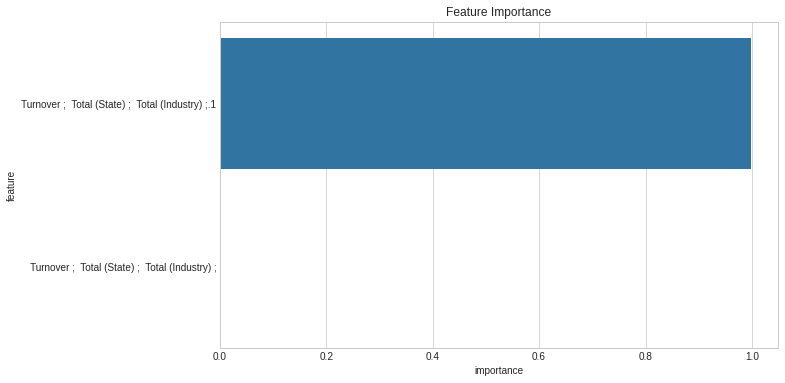

In [26]:
%%time
importance_df = pd.DataFrame({
                            'feature': X_train.columns,
                            'importance': rf_features.feature_importances_
                             }).sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(26), x='importance', y='feature');

In [27]:
"----"

'----'

In [28]:
Data['Turnover ;  Total (State) ;  Total (Industry) ;']

81      5527.3
82      5787.8
83      5739.2
84      5722.7
85      5787.3
        ...   
451    24049.2
452    26660.6
453    25937.2
454    26708.0
455    26311.9
Name: Turnover ;  Total (State) ;  Total (Industry) ;, Length: 375, dtype: object

In [32]:
First=pd.DataFrame(Data['Turnover ;  Total (State) ;  Total (Industry) ;'])
amount=pd.DataFrame(Data['Turnover ;  New South Wales ;  Total (Industry) ;.2'])

In [33]:
First

,Turnover ; Total (State) ; Total (Industry) ;
81,5527.3
82,5787.8
83,5739.2
84,5722.7
85,5787.3
...,...
451,24049.2
452,26660.6
453,25937.2
454,26708.0


In [34]:
rf = RandomForestRegressor(random_state=42)

rf_model = rf.fit(First, amount)

preds_train_RFR = rf_model.predict(First)



print('Mean R2 for Train is : ', metrics.mean_squared_error(amount, preds_train_RFR, squared = False))


Mean R2 for Train is :  197.70792259684498


In [35]:
train_score = rf.score(First,amount)
train_score

0.9898659558393896

In [36]:

#%%time
start_time = time.time()

rf_features = RandomForestRegressor() 
rf_features.fit(First, amount)

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.15574264526367188 seconds ---


In [37]:
%%time
importance_df = pd.DataFrame({
                            'feature': First.columns,
                            'importance': rf_features.feature_importances_
                             }).sort_values('importance', ascending=False)


CPU times: user 14.6 ms, sys: 0 ns, total: 14.6 ms
Wall time: 15.5 ms


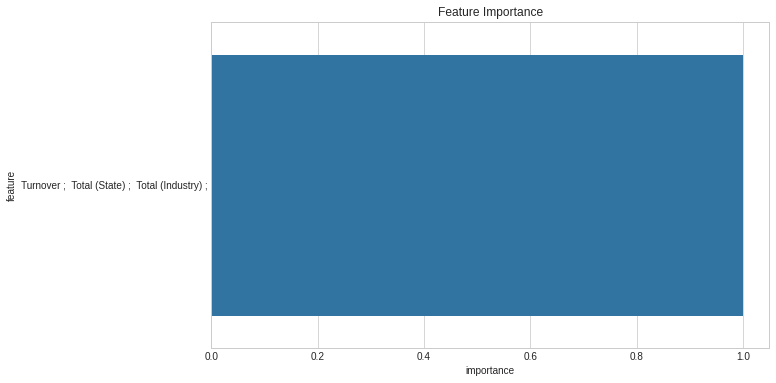

In [38]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(26), x='importance', y='feature');